# Python w analizie danych - web scraping

### Zadanie 1: Lista pracowników
1. Pobierz zawartośc strony [https://ms.polsl.pl/kzmimsi/pracownicy/](https://ms.polsl.pl/kzmimsi/pracownicy/).
2. Z zawartości wyłuskaj listę pracowników.
3. Stwórz wykres słupkowy, który przedstawi zestawienie ilości magistrów, doktorów i profesorów w Katedrze.


In [10]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [6]:
page = requests.get("https://ms.polsl.pl/kzmimsi/pracownicy/")
soup = BeautifulSoup(page.content, "html.parser")
soup

<!DOCTYPE html>

<html lang="pl">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<title>Pracownicy Katedry -  Katedra Zastosowań Matematyki i Metod Sztucznej Inteligencji Politechnika Śląska</title>
<meta content="index,follow" name="robots"/>
<meta content="Ewelina Domalik" name="author"/>
<link href="https://ms.polsl.pl/kzmimsi/core/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="https://ms.polsl.pl/kzmimsi/styl.css" rel="stylesheet" type="text/css"/>
<meta content="matematyka, matma, informatyka, infa, studia, Politechnika Slaska, Politechnika Śląska, Wydział Matematyki Stosowanej, Wydział Matematyczno-Fizyczny, Wydział Matematyczno Fizyczny, Katedra Zastosowań Matematyki i Metod Sztucznej Inteligencji, sztuczna inteligencja, katedra, zastosowania matematyki, Gliwice" name="keywords"/>
</head>
<body>
<header>
<section>
<div class="container-fluid">
<div class="row">
<div class="nn">
<ul class="n

In [7]:
soup.a.contents

['Politechnika Śląska']

In [8]:
lista = soup.select(".pracownik strong")
lista

[<strong>dr Katarzyna Adrianowicz</strong>,
 <strong>mgr inż. Arkadiusz Banasik</strong>,
 <strong>dr inż. Marek Błasik</strong>,
 <strong>prof. dr hab. Mykola Bratiichuk</strong>,
 <strong>dr inż. Rafał Brociek</strong>,
 <strong>dr Giacomo Capizzi</strong>,
 <strong>dr Robertas Damaševičius</strong>,
 <strong>dr hab. inż. Edyta Hetmaniok, prof. PŚ</strong>,
 <strong>dr hab. inż. Waldemar Hołubowski, prof. PŚ</strong>,
 <strong>dr inż. Konrad Kaczmarek</strong>,
 <strong>dr inż. Adrian Kapczyński</strong>,
 <strong>dr inż. Jarosław Karcewicz</strong>,
 <strong>dr hab. inż. Wojciech Kempa, prof. PŚ</strong>,
 <strong>mgr Martyna Kobielnik</strong>,
 <strong>dr Paweł Kozyra</strong>,
 <strong>dr inż. Marcin Lawnik</strong>,
 <strong>dr Ewa Łobos</strong>,
 <strong>dr Zbigniew Marszałek</strong>,
 <strong>dr inż. Elwira Mateja-Losa</strong>,
 <strong>dr hab. Iwona Nowak, prof. PŚ</strong>,
 <strong>dr Sebastian Pabiasz</strong>,
 <strong>dr inż. Mariusz Pleszczyński</strong>,
 <strong>dr

In [9]:
pracownicy = [i.get_text() for i in lista]
pracownicy

['dr Katarzyna Adrianowicz',
 'mgr inż. Arkadiusz Banasik',
 'dr inż. Marek Błasik',
 'prof. dr hab. Mykola Bratiichuk',
 'dr inż. Rafał Brociek',
 'dr Giacomo Capizzi',
 'dr Robertas Damaševičius',
 'dr hab. inż. Edyta Hetmaniok, prof. PŚ',
 'dr hab. inż. Waldemar Hołubowski, prof. PŚ',
 'dr inż. Konrad Kaczmarek',
 'dr inż. Adrian Kapczyński',
 'dr inż. Jarosław Karcewicz',
 'dr hab. inż. Wojciech Kempa, prof. PŚ',
 'mgr Martyna Kobielnik',
 'dr Paweł Kozyra',
 'dr inż. Marcin Lawnik',
 'dr Ewa Łobos',
 'dr Zbigniew Marszałek',
 'dr inż. Elwira Mateja-Losa',
 'dr hab. Iwona Nowak, prof. PŚ',
 'dr Sebastian Pabiasz',
 'dr inż. Mariusz Pleszczyński',
 'dr inż. Dawid Połap',
 'prof. dr hab. inż. Damian Słota',
 'dr inż. Marcin Sobota',
 'dr inż. Zdzisław Sroczyński',
 'mgr inż. Beniamin Stecuła',
 'mgr inż. Barbara Szweda',
 'dr hab. inż. Marcin Woźniak, prof. PŚ',
 'dr inż. Adam Zielonka',
 'prof. Rytis Maskeliunas',
 'prof. dr hab. inż. Radosław Grzymkowski',
 'mgr Hanna Wójtowicz']

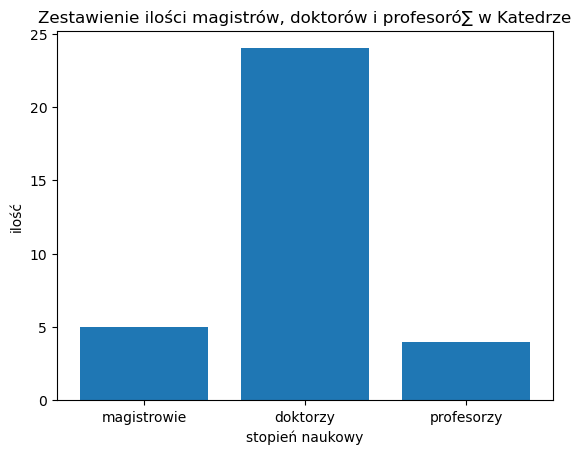

In [12]:
mgr, dr, prof = 0,0,0
for i in pracownicy:
    if "prof" in i[:5]:
        prof+=1
    elif "dr" in i:
        dr+=1
    else:
        mgr+=1

plt.bar(["magistrowie","doktorzy","profesorzy"],[mgr,dr,prof])
plt.title("Zestawienie ilości magistrów, doktorów i profesoró∑ w Katedrze")

plt.ylabel("ilość")
plt.xlabel("stopień naukowy")
plt.show()


 ### Zadanie 2: Księgarnia
1. Z zakładki Matematyka stosowana strony [https://wydawnictwopolitechniki.pl/index.php](https://wydawnictwopolitechniki.pl/index.php) pobierz za pomocą biblioteki BS wszystkie pozycje książkowe (zwróć uwagę na podstrony). Następnie stwórz słownik, który dla każdej pozycji książkowej będzie zawierał klucze: title, author, price.Poniżej przykładowy słownik:
{'title': 'Wybrane metody obliczeniowe równań całkowych.',
'author': ['GRZYMKOWSKI R., SŁOTA D.'],
'price': '16.80'}


2. Z listy słowników stwórz ramkę danych, z której:
A) odczytaj najdroższą i najtańszą książkę
B) wyświetl książki, których autorem jest GRZYMKOWSKI R.
C) stwórz wykres, który wyświetli informacje ile dany autor ma książek